In [1]:
%matplotlib notebook

import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torchvision as tv
from PIL import Image
import matplotlib.pyplot as plt
from train_transformer import *

In [42]:
def myimshow(image, ax=plt):
    img = image.cpu().clone().clamp(0, 255).numpy()
    img = img.transpose(1, 2, 0).astype("uint8")
    img = Image.fromarray(img)
    h = ax.imshow(img)
    ax.axis('off')
    return h

In [43]:
def load_image(path, size, device):
    img = Image.open(path)
    img = img.resize(size, Image.ANTIALIAS)
    transform = tv.transforms.Compose([
            tv.transforms.ToTensor(),
            tv.transforms.Lambda(lambda x: x.mul(255))
            ])
    img = transform(img)
    img = img.reshape((1, 3, size[0], size[1]))
    img = img.to(device)
    return img

In [44]:
def stylize(content_path, style_path, transformer_path, size, device):
    content = load_image(content_path, size, device)
    style = load_image(style_path, size, device)
    transformer = torch.load(transformer_path, map_location = device).eval()
    with torch.no_grad():
        output = transformer(content)
    plt.subplot(1, 3, 1)
    myimshow(content[0])
    plt.subplot(1, 3, 2)
    myimshow(output[0])
    plt.subplot(1, 3, 3)
    myimshow(style[0])

In [65]:
# image_size = (2048, 2048)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


<IPython.core.display.Javascript object>


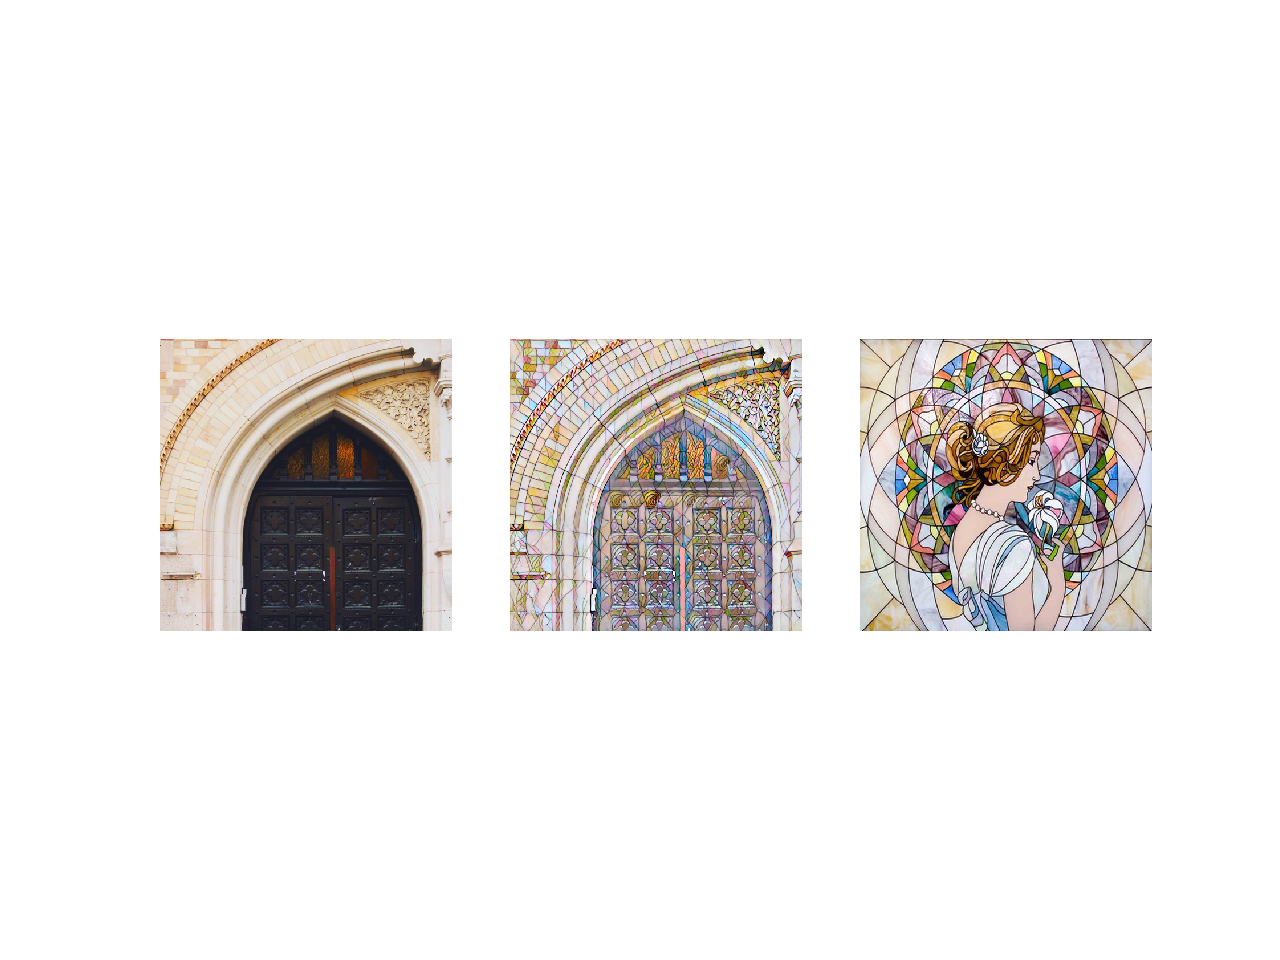

In [66]:
image_size = (512, 512)
stylize('images/content/amber.jpg', 'images/style/mosaic.jpg', 'models/mosaic', image_size, device)

<IPython.core.display.Javascript object>


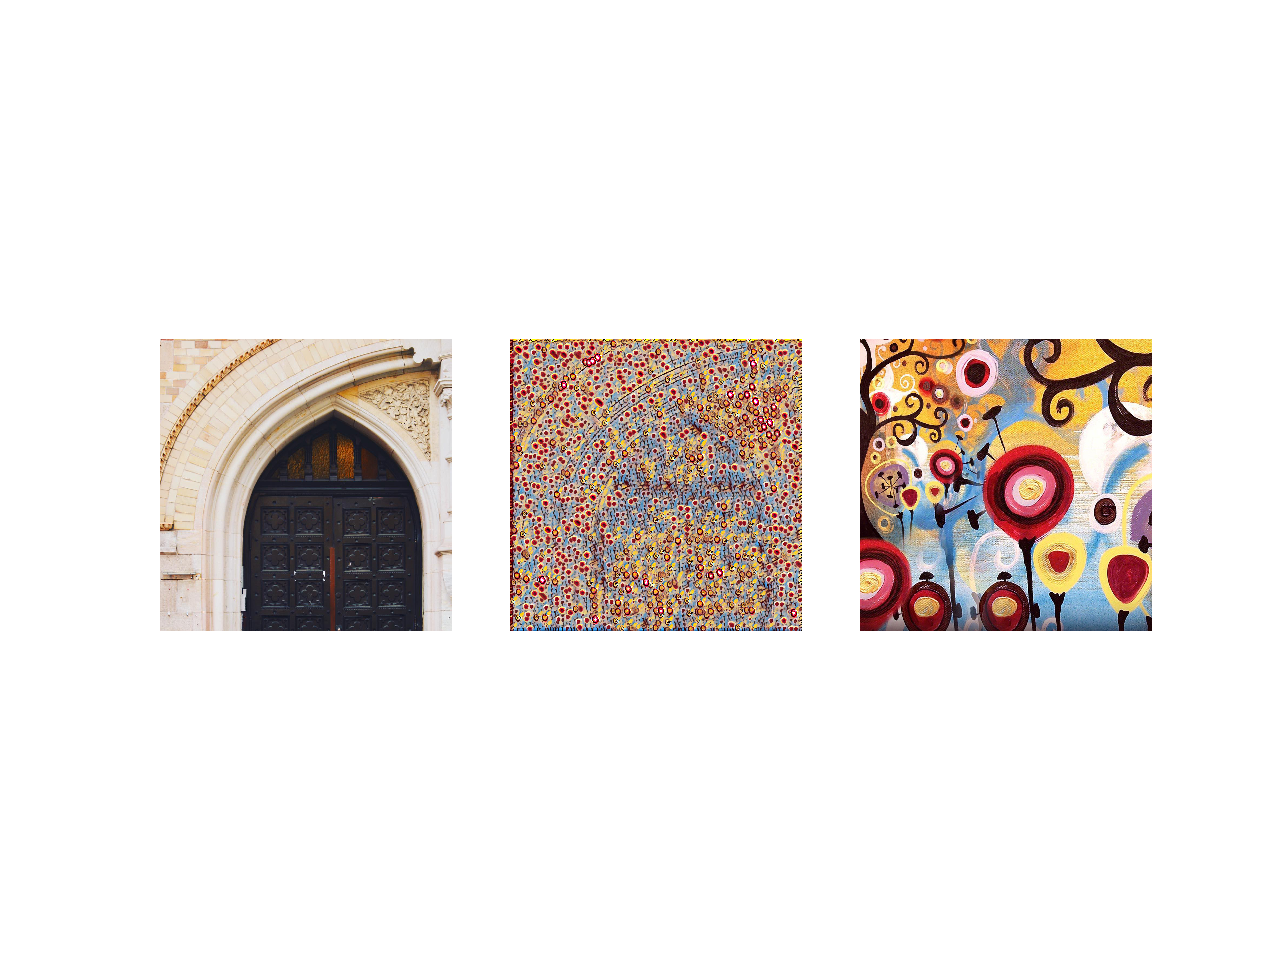

In [70]:
image_size = (2048, 2048)
stylize('images/content/amber.jpg', 'images/style/candy.jpg', 'models/candy', image_size, device)

<IPython.core.display.Javascript object>


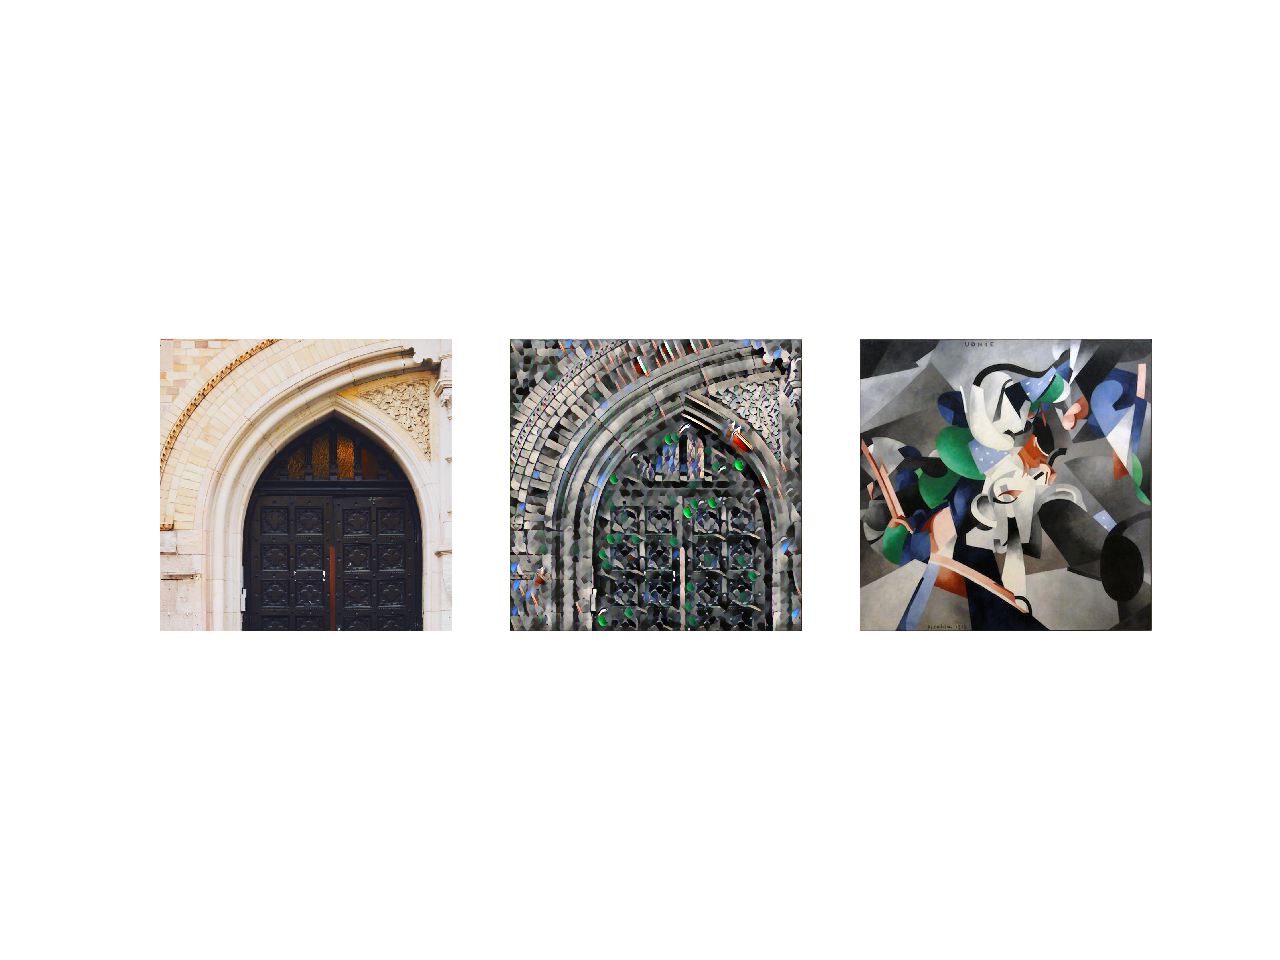

In [73]:
image_size = (1024, 1024)
stylize('images/content/amber.jpg', 'images/style/udnie.jpg', 'models/udnie', image_size, device)

<IPython.core.display.Javascript object>


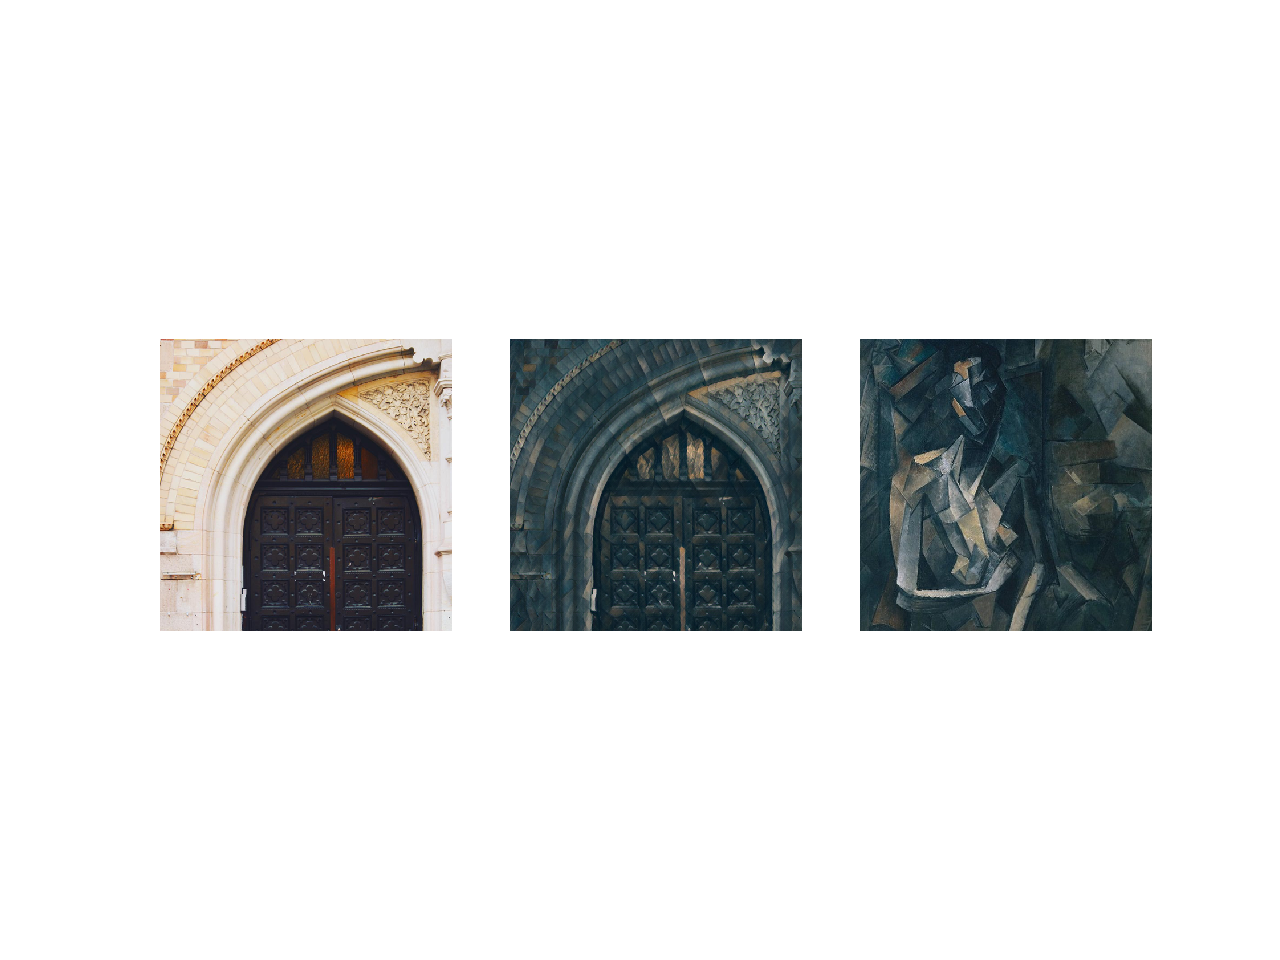

In [75]:
image_size = (512, 512)
stylize('images/content/amber.jpg', 'images/style/picasso.jpg', 'models/picasso', image_size, device)

<IPython.core.display.Javascript object>


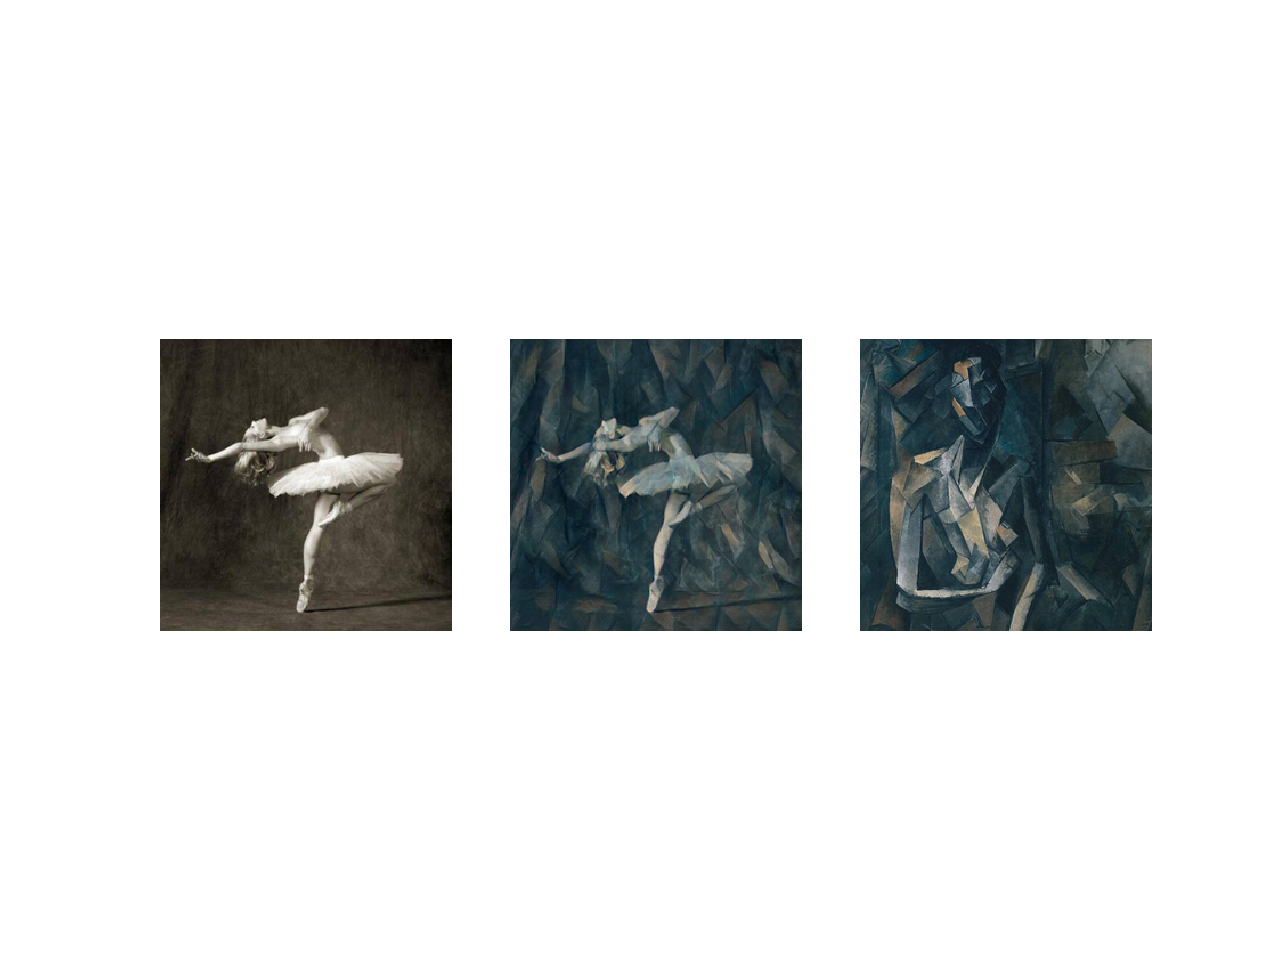

In [77]:
image_size = (256, 256)
stylize('images/content/dancing.jpg', 'images/style/picasso.jpg', 'models/picasso', image_size, device)